In [1]:
# Import matplotlib and seaborn library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import seaborn as sns
# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from skimage import data,io,transform
import zipfile
import cv2
import math
import numpy as np
import pandas as pd
from PIL import Image


In [2]:
faces = {}
with zipfile.ZipFile(r"D:\Project and assignment\faces_dataset.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            x = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)


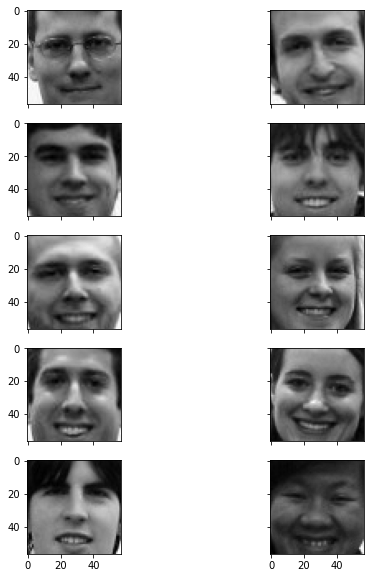

In [3]:
# Training Data
# Smiling faces of 10 people are last 10 images of the dataset
fig, axes = plt.subplots(5,2,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-10:] # take last 10 images
for i in range(10):
    axes[i%5][i//5].imshow(faceimages[i], cmap="gray")
plt.show()


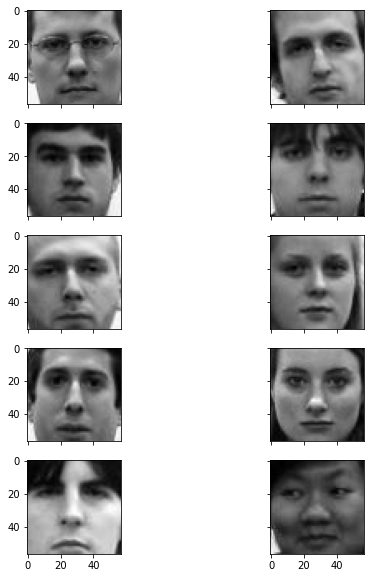

In [4]:
# Testing Data
# Normal faces of same 10 people are first 10 images in the dataset
fig, axes = plt.subplots(5,2,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[0:10] # take first 10 images
for i in range(10):
    axes[i%5][i//5].imshow(faceimages[i], cmap="gray")
plt.show()

In [5]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

Face image shape: (57, 57)


In [6]:
print(list(faces.keys())[:21])

['ns1/face1.pgm', 'ns10/face10.pgm', 'ns2/face2.pgm', 'ns3/face3.pgm', 'ns4/face4.pgm', 'ns5/face5.pgm', 'ns6/face6.pgm', 'ns7/face7.pgm', 'ns8/face8.pgm', 'ns9/face9.pgm', 's1/face1.pgm', 's10/face10.pgm', 's2/face2.pgm', 's3/face3.pgm', 's4/face4.pgm', 's5/face5.pgm', 's6/face6.pgm', 's7/face7.pgm', 's8/face8.pgm', 's9/face9.pgm']


In [7]:
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 20
Number of pictures: 20


In [8]:
# Take smiling faces for eigenfaces
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("ns1/"):
        continue
    if key.startswith("ns2/"):
        continue
    if key.startswith("ns3/"):
        continue
    if key.startswith("ns4/"):
        continue
    if key.startswith("ns5/"):
        continue
    if key.startswith("ns6/"):
        continue
    if key.startswith("ns7/"):
        continue
    if key.startswith("ns8/"):
        continue
    if key.startswith("ns9/"):
        continue
    if key.startswith("ns10/"):
        continue
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)


In [9]:
# Apply PCA to extract eigenfaces
from sklearn.decomposition import PCA
pca = PCA().fit(facematrix)

In [10]:
print(pca.explained_variance_ratio_)

[4.49690497e-01 2.38421944e-01 8.93182102e-02 5.96557869e-02
 5.08041219e-02 4.08568696e-02 3.08102532e-02 2.22765442e-02
 1.81657733e-02 3.10605421e-32]


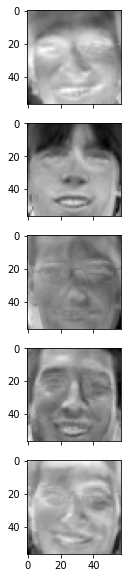

In [11]:
# Take the first K principal components as eigenfaces
n_components = 5
eigenfaces = pca.components_[:n_components]
# Show the k eigenfaces
fig, axes = plt.subplots(5,sharex=True,sharey=True,figsize=(8,10))
for i in range(5):
    axes[i].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()


In [12]:
# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

Shape of the weight matrix: (5, 10)


(5, 1)
Now to find best match !
Best match s9 with Euclidean distance 1009.077445


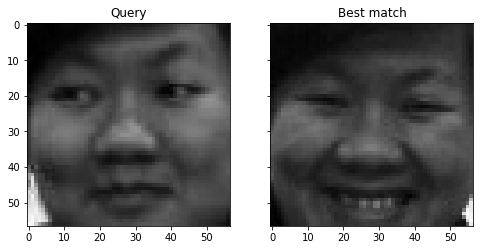

In [40]:
# Test on out-of-sample image of existing class
query = faces["ns9/face9.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
print(query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
print("Now to find best match !")
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

(5, 1)
Now to find best match !
Best match s7 with Euclidean distance 413.768142


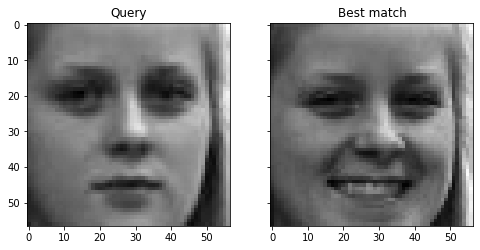

In [41]:
query = faces["ns7/face7.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
print(query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
print("Now to find best match !")
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

(5, 1)
Now to find best match !
Best match s1 with Euclidean distance 713.490139


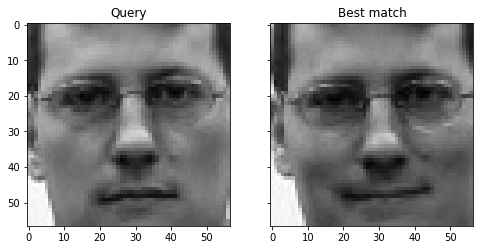

In [42]:
query = faces["ns1/face1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
print(query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
print("Now to find best match !")
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

(5, 1)
Now to find best match !
Best match s2 with Euclidean distance 676.188505


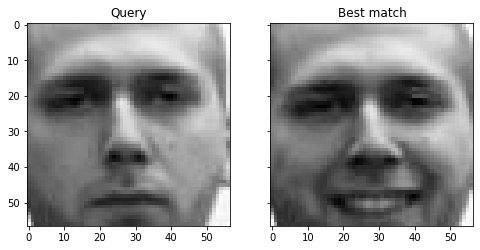

In [43]:
query = faces["ns2/face2.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
print(query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
print("Now to find best match !")
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

(5, 1)
Now to find best match !
Best match s3 with Euclidean distance 653.704725


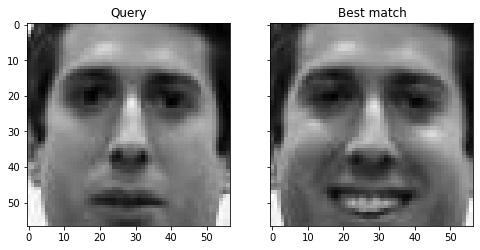

In [44]:
query = faces["ns3/face3.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
print(query_weight.shape)
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
print("Now to find best match !")
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()